# Chunking
Sometimes reading the entire file into memory isn't possible. However, you might be able to summarize the data by reading it in pieces.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

dfUrl = 'data/advertising.csv'

df = pd.read_csv(dfUrl, chunksize=5)
df

> Using the `chunksize` option, we created an iterator for the file instead of the typical DataFrame.

We can read over the chunks to get the data in pieces (i.e., chunks).

Chunk 1 read. Contains 5. Total records read: 20.
Chunk 2 read. Contains 5. Total records read: 40.
Chunk 3 read. Contains 5. Total records read: 60.
Chunk 4 read. Contains 5. Total records read: 80.
Chunk 5 read. Contains 5. Total records read: 100.
Chunk 6 read. Contains 5. Total records read: 120.
Chunk 7 read. Contains 5. Total records read: 140.
Chunk 8 read. Contains 5. Total records read: 160.
Chunk 9 read. Contains 5. Total records read: 180.
Chunk 10 read. Contains 5. Total records read: 200.
Chunk 11 read. Contains 5. Total records read: 220.
Chunk 12 read. Contains 5. Total records read: 240.
Chunk 13 read. Contains 5. Total records read: 260.
Chunk 14 read. Contains 5. Total records read: 280.
Chunk 15 read. Contains 5. Total records read: 300.
Chunk 16 read. Contains 5. Total records read: 320.
Chunk 17 read. Contains 5. Total records read: 340.
Chunk 18 read. Contains 5. Total records read: 360.
Chunk 19 read. Contains 5. Total records read: 380.
Chunk 20 read. Contains 5

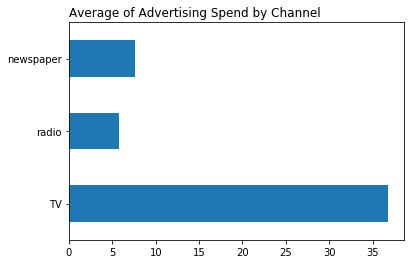

In [2]:
channels = dict()
features = ['TV', 'radio', 'newspaper', 'sales']
records = 0

i = 1
# each chunk will be 5 rows.
for chunk in df:
    for feature in features:
        channels[feature] = channels.get(feature, 0) + chunk[feature].sum()
        records += chunk.shape[0]
    print(f'Chunk {i} read. Contains {chunk.shape[0]}. Total records read: {records}.')
    i += 1
        
channels = pd.Series(channels)/records

channels[['TV', 'radio', 'newspaper']].plot.barh()
plt.title('Average of Advertising Spend by Channel', loc='left')
plt.show()

## We could also use this for mining very large text documents.

In [3]:
im = pd.read_csv('data/imdb.csv', chunksize=1)
next(im)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1


> Create a word cloud while only importing 1 row at a time.

In [4]:
import datetime
words = dict()

im = pd.read_csv('data/imdb.csv', chunksize=1)

st = datetime.datetime.now()
for chunk in im:
    r = chunk['review'].str.split(' ').tolist()[0]
    for w in r:
        words[w.lower()] = words.get(w.lower(), 0) + 1

en = datetime.datetime.now()
el = en - st

print(f'Completed in {el}')

Completed in 0:01:49.514995


In [5]:
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 392,053


In [6]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#### Remove the stopwords from our frequencies.

In [7]:
for sw in list(STOPWORDS):
    words.pop(sw, None)
    
print(f'Length of new dictionary: {len(words.keys()):,}')

Length of new dictionary: 391,863


### Plot the word cloud.

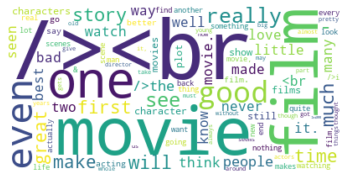

In [8]:
wc = WordCloud(background_color="white", max_words=100)

# generate word cloud
wc.generate_from_frequencies(words)

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

> Could also use this to in conjunction with mini-batches for training or scoring large datasets with limited computing resources and to inform some of the feature engineering.